# <font color='purple'>Bank Churn Prediction</font>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Importing Dataset

In [2]:
df = pd.read_csv('Churn_Modelling.csv')

In [3]:
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [4]:
df.shape

(10000, 14)

In [5]:
df.drop(labels=['CustomerId', 'RowNumber', 'Surname'], axis=1, inplace=True)

In [6]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [9]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## Visualization

In [10]:
feature_list = ['Geography', 'Gender', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']

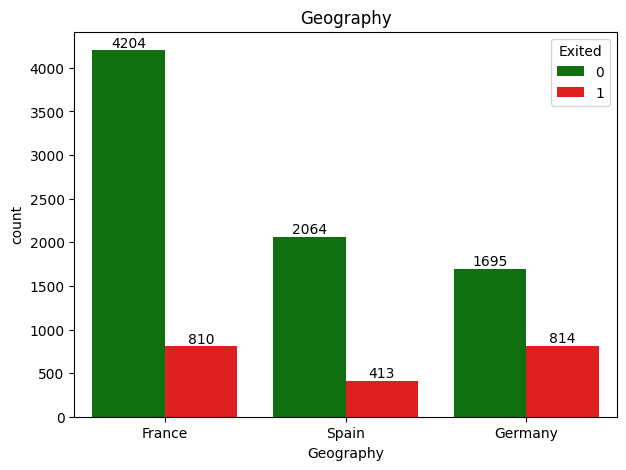

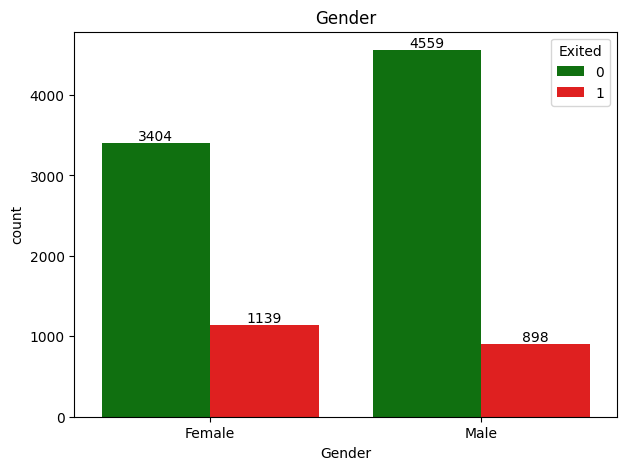

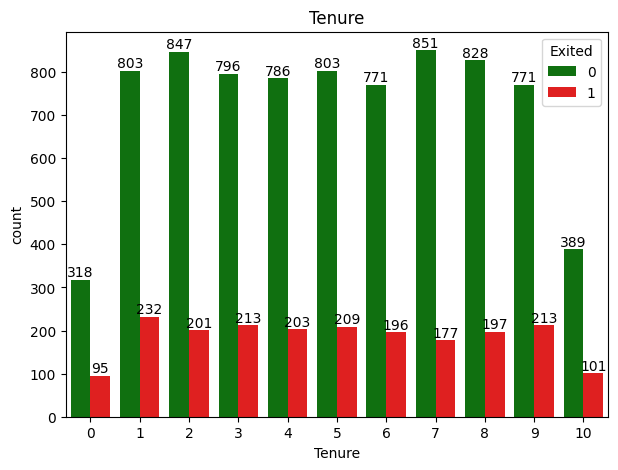

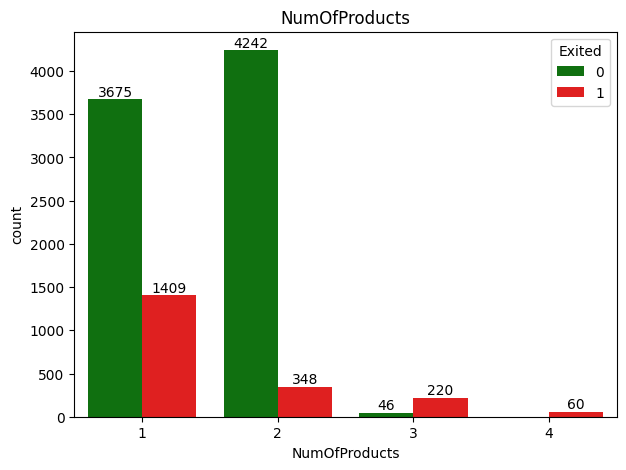

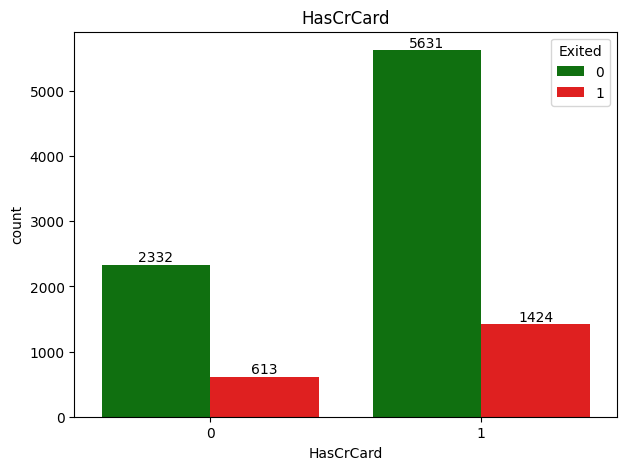

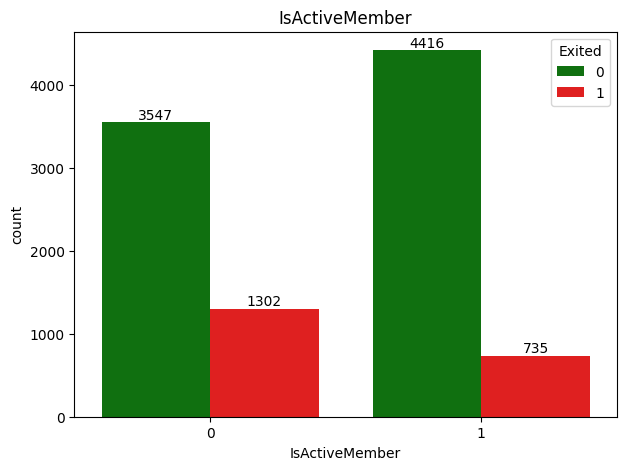

In [11]:
for feature in feature_list:
    plt.figure(figsize=(7,5))
    plt.title(feature)
    ax=sns.countplot(x=feature, hue='Exited', data=df, palette=['green', 'red'])
    
    for container in ax.containers:
        ax.bar_label(container)

<AxesSubplot:xlabel='Exited', ylabel='Age'>

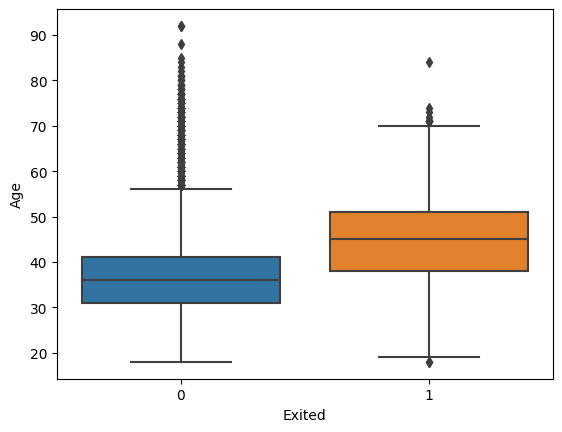

In [12]:
sns.boxplot(data=df, x='Exited', y='Age')

<AxesSubplot:xlabel='Exited', ylabel='CreditScore'>

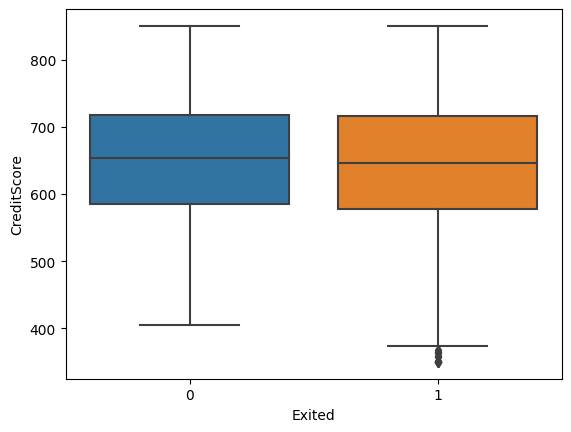

In [13]:
sns.boxplot(data=df, x='Exited', y='CreditScore')

<AxesSubplot:xlabel='Exited', ylabel='Balance'>

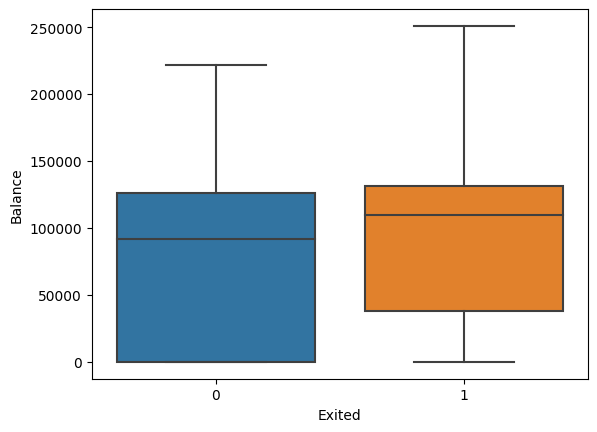

In [14]:
sns.boxplot(data=df, x='Exited', y='Balance')

[Text(0, 0, '7963'), Text(0, 0, '2037')]

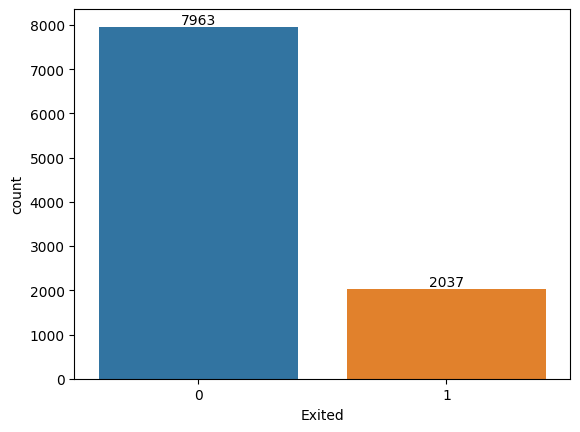

In [15]:
ax=sns.countplot(data=df, x='Exited')
ax.bar_label(container=ax.containers[0], labels=df['Exited'].value_counts())

As We can see the dataset is highly imbalance so we have to balance the dataset


## Data Preprocessing

In [16]:
#label Encoding
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
for col in ['Geography', 'Gender']:
    df[col] = encoder.fit_transform(df[col])

In [17]:
df.sample(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
8067,530,0,0,29,5,0.00,2,0,0,121451.21,0
1787,669,0,1,25,1,157848.53,1,0,0,37543.93,1
5323,622,0,1,32,5,179305.09,1,1,1,149043.78,0
6384,529,0,0,31,7,0.00,2,1,1,175697.87,0
4052,616,1,1,41,10,113220.20,2,1,1,114072.91,0


In [18]:
#balancing the dataset
from imblearn.over_sampling import RandomOverSampler

X=df.drop(['Exited'], axis=1)
y=df['Exited']

ros = RandomOverSampler(sampling_strategy='minority')
X_balanced, y_balanced = ros.fit_resample(X, y)

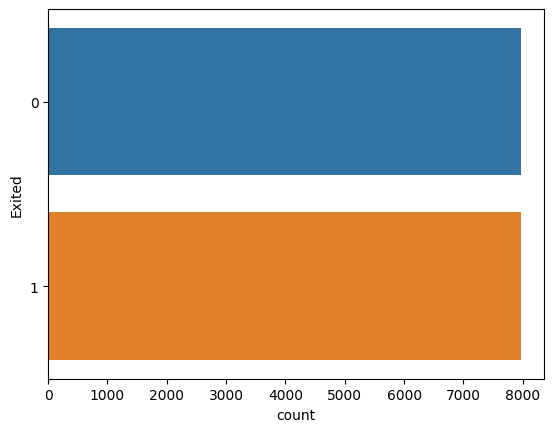

In [19]:
ax=sns.countplot(data=df, y=y_balanced)

## Training and Testing the Data

In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.3, random_state=1, stratify=y_balanced)

In [47]:
y_train.value_counts()

0    5574
1    5574
Name: Exited, dtype: int64

In [48]:
rf = RandomForestClassifier(n_estimators=50)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50)

In [49]:
y_pred = rf.predict(X_test)

In [50]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94      2389
           1       0.92      0.97      0.94      2389

    accuracy                           0.94      4778
   macro avg       0.94      0.94      0.94      4778
weighted avg       0.94      0.94      0.94      4778



<AxesSubplot:>

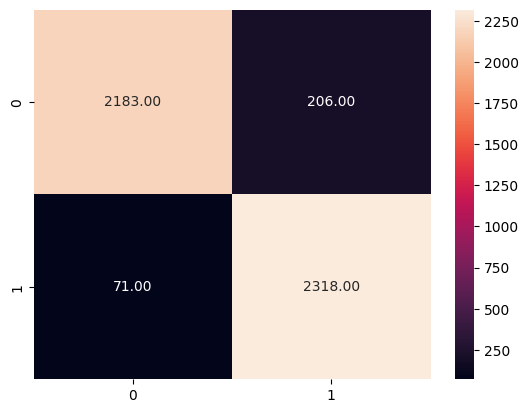

In [51]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='.2f')